## Install dependencies and libraries

In [ ]:
!pip install pandas_ta

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.1/115.1 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pandas_ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218907 sha256=c1b2ed659182f75317d715fcec833fb2b1c4f07cfcf1936da7140713c324333e
  Stored in directory: /root/.cache/pip/wheels/69/00/ac/f7fa862c34b0e2ef320175100c233377b4c558944f12474cf0
Successfully built pandas_ta


In [ ]:
!pip install yfinance

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime as dt
import yfinance as yf
import pandas_ta as ta


##

In [ ]:
# Set the start and end date
start_date = '2020-01-01'
end_date = '2024-01-01'

# Set the ticker
ticker = 'AMZN' #Amazon stocks

# Get the data
data = yf.download(ticker, start_date, end_date)

# Print 5 rows
data.tail()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,153.770004,154.350006,152.710007,153.419998,153.419998,29480100
2023-12-26,153.559998,153.979996,153.029999,153.410004,153.410004,25067200
2023-12-27,153.559998,154.779999,153.119995,153.339996,153.339996,31434700
2023-12-28,153.720001,154.080002,152.949997,153.380005,153.380005,27057000
2023-12-29,153.100006,153.889999,151.029999,151.940002,151.940002,39789000


In [ ]:
# %change and log change in stock's closing prices
data['pct_change'] = (data['Close'] - data['Close'].shift(1))/ data['Close'].shift(1)
data['log_change'] = np.log(data['Close']/ data['Close'].shift(1))

## Technical Indicators

In [ ]:
data.ta.indicators()

Pandas TA - Technical Analysis Indicators - v0.3.14b0
Total Indicators & Utilities: 205
Abbreviations:
    aberration, above, above_value, accbands, ad, adosc, adx, alma, amat, ao, aobv, apo, aroon, atr, bbands, below, below_value, bias, bop, brar, cci, cdl_pattern, cdl_z, cfo, cg, chop, cksp, cmf, cmo, coppock, cross, cross_value, cti, decay, decreasing, dema, dm, donchian, dpo, ebsw, efi, ema, entropy, eom, er, eri, fisher, fwma, ha, hilo, hl2, hlc3, hma, hwc, hwma, ichimoku, increasing, inertia, jma, kama, kc, kdj, kst, kurtosis, kvo, linreg, log_return, long_run, macd, mad, massi, mcgd, median, mfi, midpoint, midprice, mom, natr, nvi, obv, ohlc4, pdist, percent_return, pgo, ppo, psar, psl, pvi, pvo, pvol, pvr, pvt, pwma, qqe, qstick, quantile, rma, roc, rsi, rsx, rvgi, rvi, short_run, sinwma, skew, slope, sma, smi, squeeze, squeeze_pro, ssf, stc, stdev, stoch, stochrsi, supertrend, swma, t3, td_seq, tema, thermo, tos_stdevall, trima, trix, true_range, tsi, tsignals, ttm_trend, ui, 

In [ ]:
# Calculate Simple Moving Average (SMA)
data['SMA_07'] = ta.sma(data['Close'], length=7)  # 7-period SMA
data['SMA_14'] = ta.sma(data['Close'], length=14)  # 14-period SMA
data['SMA_21'] = ta.sma(data['Close'], length=21)  # 21-period SMA
data['SMA_50'] = ta.sma(data['Close'], length=50)
data['SMA_100'] = ta.sma(data['Close'], length=100)


# Calculate Moving Average Convergence Divergence (MACD)
macd_data = ta.macd(data['Close'], fast=12, slow=26, signal=9)

# Extract MACD values from the result
data['MACD'] = macd_data['MACD_12_26_9']

# Calculate Relative Strength Index (RSI)
data['RSI_14'] = ta.rsi(data['Close'], length=14)  # 14-period RSI

# Calculate Average True Range (ATR)
data['ATR_14'] = ta.atr(data['High'], data['Low'], data['Close'], length=14)  # 14-period ATR

# Calculate Bollinger Bands
bbands_data = ta.bbands(data['Close'], length=20, std=2)  # 20-period BB with 2 standard deviations

# Extract the Bollinger Bands columns
data['BB_LOWER'] = bbands_data['BBL_20_2.0']
data['BB_MIDDLE'] = bbands_data['BBM_20_2.0']
data['BB_UPPER'] = bbands_data['BBU_20_2.0']

# Calculate Relative Strength Value (RSV) for Stochastic Oscillator
def calculate_rsv(close, length=14):
    low_min = close.rolling(window=length, min_periods=1).min()
    high_max = close.rolling(window=length, min_periods=1).max()
    return (close - low_min) / (high_max - low_min) * 100

data['RSV_14'] = calculate_rsv(data['Close'], length=14)



In [ ]:
data.head()

,Open,High,Low,Close,Adj Close,Volume,pct_change,log_change,SMA_07,SMA_14,SMA_21,SMA_50,SMA_100,MACD,RSI_14,ATR_14,BB_LOWER,BB_MIDDLE,BB_UPPER,RSV_14
Date,,,,,,,,,,,,,,,,,,,,
2020-01-02,93.750000,94.900497,93.207497,94.900497,94.900497,80580000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-03,93.224998,94.309998,93.224998,93.748497,93.748497,75288000,-0.012139,-0.012213,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
2020-01-06,93.000000,95.184502,93.000000,95.143997,95.143997,81236000,0.014886,0.014776,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000
2020-01-07,95.224998,95.694504,94.601997,95.343002,95.343002,80898000,0.002092,0.002089,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.000000
2020-01-08,94.902000,95.550003,94.321999,94.598503,94.598503,70160000,-0.007809,-0.007839,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.308452


In [ ]:
data = data.dropna()
data.head()

,Open,High,Low,Close,Adj Close,Volume,pct_change,log_change,SMA_07,SMA_14,SMA_21,SMA_50,SMA_100,MACD,RSI_14,ATR_14,BB_LOWER,BB_MIDDLE,BB_UPPER,RSV_14
Date,,,,,,,,,,,,,,,,,,,,
2020-05-26,122.900002,123.099998,120.703003,121.093002,121.093002,71364000,-0.006164,-0.006183,122.062787,120.392822,119.444310,109.98467,103.724890,2.998003,57.405187,3.210942,113.909932,119.476525,125.043119,48.131974
2020-05-27,120.249496,120.679001,116.500000,120.519501,120.519501,101138000,-0.004736,-0.004747,122.067144,120.604001,119.526191,110.70591,103.981080,2.751273,56.042825,3.309720,114.413882,119.717300,125.020718,37.903358
2020-05-28,119.216499,121.848503,118.911499,120.055000,120.055000,63804000,-0.003854,-0.003862,121.887429,120.723608,119.733381,111.29917,104.244145,2.489559,54.906246,3.283083,114.506719,119.788276,125.069832,31.314232
2020-05-29,120.796997,122.118500,119.910004,122.118500,122.118500,70198000,0.017188,0.017042,121.837715,120.947751,119.899239,111.91154,104.513890,2.420750,58.894495,3.206286,114.620438,119.709201,124.797963,60.585806
2020-06-01,122.400002,123.846497,122.208504,123.552002,123.552002,58578000,0.011739,0.011670,121.645572,121.169322,119.892191,112.50165,104.795980,2.453607,61.445546,3.100643,115.465774,120.171701,124.877627,80.920614


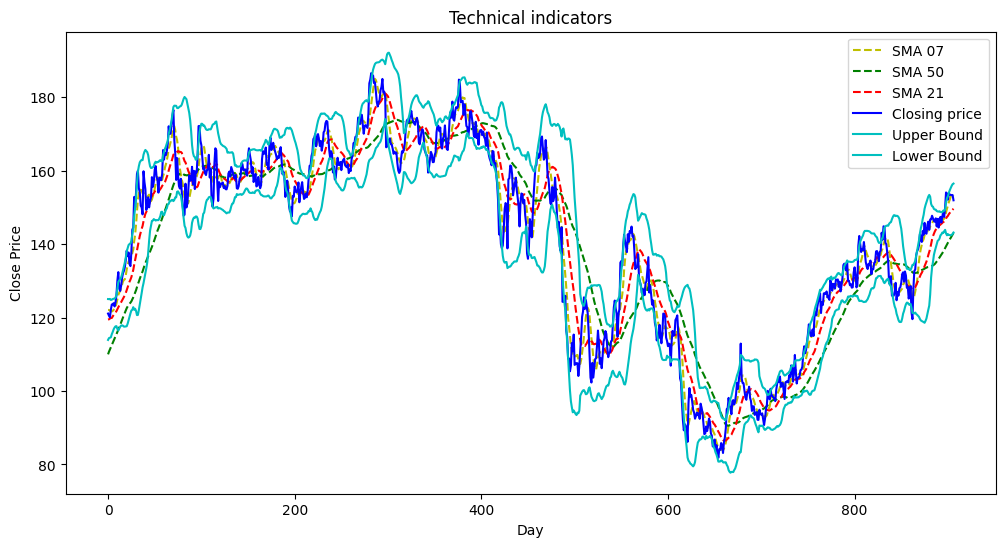

In [ ]:
x_ = np.arange(data.shape[0])
plt.figure(figsize=(12, 6))
plt.plot(data['SMA_07'].values, label = 'SMA 07', color = 'y', linestyle = '--')
plt.plot(data['SMA_50'].values, label = 'SMA 50', color = 'g', linestyle = '--')
plt.plot(data['SMA_21'].values, label = 'SMA 21', color = 'r', linestyle = '--')
plt.plot(data['Close'].values, label = 'Closing price', color = 'b')
plt.plot(data['BB_UPPER'].values, label = 'Upper Bound', color = 'c')
plt.plot(data['BB_LOWER'].values, label = 'Lower Bound', color = 'c')
plt.fill_between(x_, data['BB_LOWER'].values, data['BB_LOWER'].values, alpha = 0.35)
plt.title('Technical indicators')
plt.ylabel('Close Price')
plt.xlabel('Day')
plt.legend()


In [ ]:
data_t = data.iloc[:,8:]
data_t.head()

,SMA_07,SMA_14,SMA_21,SMA_50,SMA_100,MACD,RSI_14,ATR_14,BB_LOWER,BB_MIDDLE,BB_UPPER,RSV_14
Date,,,,,,,,,,,,
2020-05-26,122.062787,120.392822,119.444310,109.98467,103.724890,2.998003,57.405187,3.210942,113.909932,119.476525,125.043119,48.131974
2020-05-27,122.067144,120.604001,119.526191,110.70591,103.981080,2.751273,56.042825,3.309720,114.413882,119.717300,125.020718,37.903358
2020-05-28,121.887429,120.723608,119.733381,111.29917,104.244145,2.489559,54.906246,3.283083,114.506719,119.788276,125.069832,31.314232
2020-05-29,121.837715,120.947751,119.899239,111.91154,104.513890,2.420750,58.894495,3.206286,114.620438,119.709201,124.797963,60.585806
2020-06-01,121.645572,121.169322,119.892191,112.50165,104.795980,2.453607,61.445546,3.100643,115.465774,120.171701,124.877627,80.920614


## Fourier Transforms

<ipython-input-12-4a829b2c4c3f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'FT_{num_}components'] = np.fft.ifft(fft_list_m10)
/usr/local/lib/python3.10/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
<ipython-input-12-4a829b2c4c3f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[f'FT_{num_}components'] = np.fft.ifft(fft_list_m10)
/usr/local/lib/python3.10/dist-packages/matplotlib/cbo

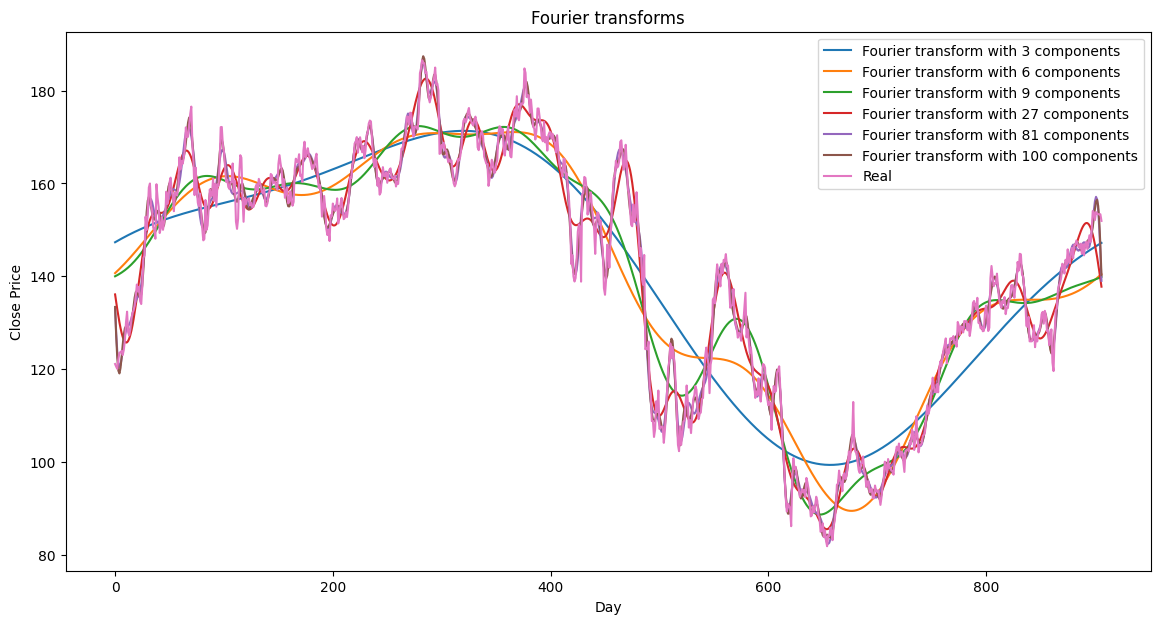

In [ ]:
# calculate the Fast Fourier Transform (FFT) of the closing prices and stores the result
close_fft = np.fft.fft(np.asarray(data['Close'].tolist()))
fft_df = pd.DataFrame({'fft':close_fft})
# compute the absolute values and phase angles of the FFT values and store them in new columns
fft_df['absolute'] = fft_df['fft'].apply(lambda x: np.abs(x))
fft_df['angle'] = fft_df['fft'].apply(lambda x: np.angle(x))

plt.figure(figsize=(14, 7), dpi=100)
fft_list = np.asarray(fft_df['fft'].tolist())
for num_ in [3, 6, 9, 27, 81, 100]:
    fft_list_m10= np.copy(fft_list); fft_list_m10[num_:-num_] = 0
    data[f'FT_{num_}components'] = np.fft.ifft(fft_list_m10)
    plt.plot(np.fft.ifft(fft_list_m10), label='Fourier transform with {} components'.format(num_))
plt.plot(data['Close'].values,  label='Real')
plt.xlabel('Day')
plt.ylabel('Close Price')
plt.title('Fourier transforms')
plt.legend()
plt.show()

In [ ]:
data['FT_3components'] = data['FT_3components'].astype('float')
data['FT_6components'] = data['FT_6components'].astype('float')
data['FT_9components'] = data['FT_9components'].astype('float')
data['FT_27components'] = data['FT_27components'].astype('float')
data['FT_81components'] = data['FT_81components'].astype('float')
data['FT_100components'] = data['FT_100components'].astype('float')
data.head()

<ipython-input-53-233edb2fcc5f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['FT_3components'] = data['FT_3components'].astype('float')
<ipython-input-53-233edb2fcc5f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['FT_6components'] = data['FT_6components'].astype('float')
<ipython-input-53-233edb2fcc5f>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: 

,Open,High,Low,Close,Adj Close,Volume,pct_change,log_change,SMA_07,SMA_14,...,BB_LOWER,BB_MIDDLE,BB_UPPER,RSV_14,FT_3components,FT_6components,FT_9components,FT_27components,FT_81components,FT_100components
Date,,,,,,,,,,,,,,,,,,,,,
2020-05-26,122.900002,123.099998,120.703003,121.093002,121.093002,71364000,-0.006164,-0.006183,122.062787,120.392822,...,113.909932,119.476525,125.043119,48.131974,147.335972,140.683243,139.998095,136.093582,133.031545,133.392025
2020-05-27,120.249496,120.679001,116.500000,120.519501,120.519501,101138000,-0.004736,-0.004747,122.067144,120.604001,...,114.413882,119.717300,125.020718,37.903358,147.471658,140.903212,140.117815,134.458143,127.761801,127.145829
2020-05-28,119.216499,121.848503,118.911499,120.055000,120.055000,63804000,-0.003854,-0.003862,121.887429,120.723608,...,114.506719,119.788276,125.069832,31.314232,147.605922,141.126894,140.243517,132.884647,123.760151,122.381789
2020-05-29,120.796997,122.118500,119.910004,122.118500,122.118500,70198000,0.017188,0.017042,121.837715,120.947751,...,114.620438,119.709201,124.797963,60.585806,147.738772,141.354208,140.375545,131.402958,121.323848,119.651524
2020-06-01,122.400002,123.846497,122.208504,123.552002,123.552002,58578000,0.011739,0.011670,121.645572,121.169322,...,115.465774,120.171701,124.877627,80.920614,147.870217,141.585073,140.514229,130.041813,120.461870,119.059476


## XGBoost

In [ ]:
import xgboost as xgb

In [ ]:
def get_feature_importance_data(data_income):
    df = data_income.copy()
    y = data['Close']
    X = df.iloc[:, 1:]

    train_samples = int(X.shape[0] * 0.65)

    X_train = X.iloc[:train_samples]
    X_test = X.iloc[train_samples:]

    y_train = y.iloc[:train_samples]
    y_test = y.iloc[train_samples:]

    return (X_train, y_train), (X_test, y_test)

In [ ]:
# Get training and test data
(X_train_FI, y_train_FI), (X_test_FI, y_test_FI) = get_feature_importance_data(data_t)

In [ ]:
regressor = xgb.XGBRegressor(gamma=0.0,n_estimators=150,base_score=0.7,colsample_bytree=1,learning_rate=0.05)

In [ ]:
xgbModel = regressor.fit(X_train_FI,y_train_FI, \
                         eval_set = [(X_train_FI, y_train_FI), (X_test_FI, y_test_FI)], \
                         verbose=False)

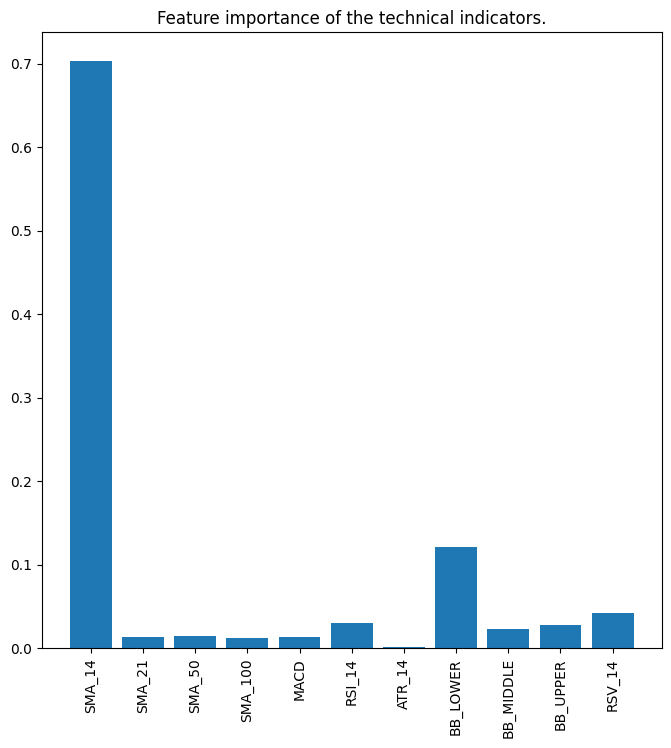

In [ ]:
fig = plt.figure(figsize=(8,8))
plt.xticks(rotation='vertical')
plt.bar([i for i in range(len(xgbModel.feature_importances_))], xgbModel.feature_importances_.tolist(), tick_label=X_test_FI.columns)
plt.title('Feature importance of the technical indicators.')
plt.show()

In [ ]:
data.to_csv('stock.csv')